In [ ]:

# PCA FEATURE SELECTION,RF
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense,Softmax
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pip list

Package                  Version        
------------------------ ---------------
absl-py                  0.9.0          
alabaster                0.7.12         
albumentations           0.1.12         
altair                   4.1.0          
asgiref                  3.2.7          
astor                    0.8.1          
astropy                  4.0.1.post1    
astunparse               1.6.3          
atari-py                 0.2.6          
atomicwrites             1.4.0          
attrs                    19.3.0         
audioread                2.1.8          
autograd                 1.3            
Babel                    2.8.0          
backcall                 0.1.0          
beautifulsoup4           4.6.3          
bleach                   3.1.5          
blis                     0.4.1          
bokeh                    1.4.0          
boto                     2.49.0         
boto3                    1.13.1         
botocore                 1.16.1         
Bottleneck      

# Data loading


In [ ]:
data=pd.read_excel(r'F:\DOWNLOADS2\uci-credit-approval\uci-credit-approval\crx.data.xlsx')
print(data.head())

  C0     C1     C2 C3 C4 C5 C6    C7 C8 C9  C10 C11 C12  C13  C14 C15
0  b  30.83  0.000  u  g  w  v  1.25  t  t    1   f   g  202    0   +
1  a  58.67  4.460  u  g  q  h  3.04  t  t    6   f   g   43  560   +
2  a   24.5  0.500  u  g  q  h  1.50  t  f    0   f   g  280  824   +
3  b  27.83  1.540  u  g  w  v  3.75  t  t    5   t   g  100    3   +
4  b  20.17  5.625  u  g  w  v  1.71  t  f    0   f   s  120    0   +


In [ ]:
data1=pd.read_csv(r'D:\PYTHON\MACHINE LEARNING USING PYTHON\ML\ITML24\DATABASE\credit1.csv')
print(data1.head())

  checking_balance  months_loan_duration credit_history    purpose  amount  \
0           < 0 DM                     6       critical   radio/tv    1169   
1       1 - 200 DM                    48         repaid   radio/tv    5951   
2          unknown                    12       critical  education    2096   
3           < 0 DM                    42         repaid  furniture    7882   
4           < 0 DM                    24        delayed  car (new)    4870   

  savings_balance employment_length  installment_rate personal_status  \
0         unknown           > 7 yrs                 4     single male   
1        < 100 DM         1 - 4 yrs                 2          female   
2        < 100 DM         4 - 7 yrs                 2     single male   
3        < 100 DM         4 - 7 yrs                 2     single male   
4        < 100 DM         1 - 4 yrs                 3     single male   

  other_debtors  ...                  property age  installment_plan  \
0          none  ...

# label encoding

In [ ]:
label_encoder=LabelEncoder()
print(type(data['C1'].values[0]))
columns=data.columns
for cols in columns:
   # print(cols)
    if(isinstance(data[cols].values[0],str)):
        data[cols]=label_encoder.fit_transform(data[cols].values)

<class 'float'>


In [ ]:
label_encoder=LabelEncoder()
columns=data1.columns
for cols in columns:
   # print(cols)
    if(isinstance(data1[cols].values[0],str)):
        data1[cols]=label_encoder.fit_transform(data1[cols].values)

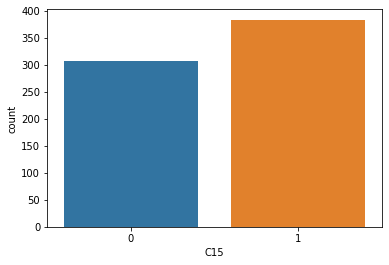

In [ ]:
sns.countplot(data['C15'])

In [ ]:
data1.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,1,6,0,7,1169,4,3,4,3,2,...,2,67,1,1,2,1,1,1,1,1
1,0,48,4,7,5951,2,1,2,1,2,...,2,22,1,1,1,2,1,0,1,1
2,3,12,0,4,2096,2,2,2,3,2,...,2,49,1,1,1,1,2,0,1,3
3,1,42,4,5,7882,2,2,2,3,1,...,0,45,1,0,1,1,2,0,1,1
4,1,24,1,1,4870,2,1,3,3,2,...,3,53,1,0,2,2,2,0,1,1


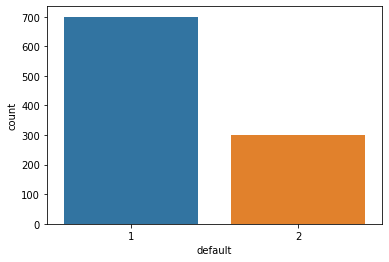

In [ ]:
sns.countplot(data1['default'])

# data cleaning

In [ ]:
print(type(data['C1'].values[86]),data['C1'].values[98])

<class 'str'> 22.5


In [ ]:
data1.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
default                 0
dependents              0
telephone               0
foreign_worker          0
job                     0
dtype: int64

In [ ]:
x1=data1.drop(['default'],axis=1).values
y1=data1['default'].values


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=False)
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)
print(X_train.shape,X_test.shape)

(552, 15) (138, 15)


In [ ]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(x1,y1,stratify=y1,test_size=0.2,random_state=False)
scaler=StandardScaler()
x_train1=scaler.fit_transform(X_train1)
x_test1=scaler.transform(X_test1)
print(X_train1.shape,X_test1.shape)

(800, 20) (200, 20)


In [ ]:
Y_train1.shape

(800,)

0.73
[[133  47]
 [  7  13]]


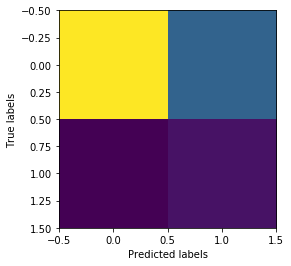

In [ ]:
svm=SVC()
svm.fit(x_train1,Y_train1)
y_pred=svm.predict(x_test1)
print(accuracy_score(y_pred,Y_test1))
print(confusion_matrix(y_pred,Y_test1))
plt.imshow(confusion_matrix(y_pred,Y_test1))
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,Y_train)
y_pred=lr.predict(x_test)
print(accuracy_score(y_pred,Y_test))

0.8768115942028986


C:\Users\SPIRO\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
lr=LogisticRegression()
lr.fit(x_train1,Y_train1)
y_pred=lr.predict(x_test1)
print(accuracy_score(y_pred,Y_test1))

0.715


C:\Users\SPIRO\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.66
[[101  29]
 [ 39  31]]


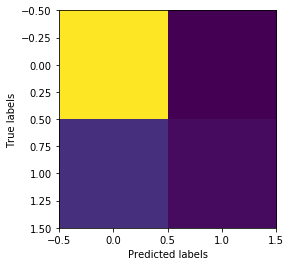

In [ ]:
Nb= GaussianNB()
Nb.fit(x_train1,Y_train1)
y_pred=Nb.predict(x_test1)
print(accuracy_score(y_pred,Y_test1))
print(confusion_matrix(y_pred,Y_test1))
plt.imshow(confusion_matrix(y_pred,Y_test1))
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [ ]:
class Naive_bayes_classifier:
    def fit(self,X,Y):
        self.mean_x=X.mean(axis=0)
        self.std_x=np.std(X,axis=0)
        self.mean_y=Y.mean()
        self.std_y=np.std(Y)
        self.total=Y.shape[0]
        self.Y=Y
        print(self.mean_x.shape)
        print(self.std_x.shape)
        print(self.mean_y)
        print(self.std_y)
        self.cls=np.unique(Y)
        seperated_class={}
        for c in self.cls:
            print(c)
            seperated_class[c]=list()
            for j in range(Y.shape[0]):
                if c==Y[j]:
                    seperated_class[c].append(list(X[j]))
        print(np.array(seperated_class[1]).shape)
        self.sumarize={}
        for labels in seperated_class:
            self.sumarize[labels]=list()
           # print(np.array(seperated_class[labels]).shape)
            for cols in zip(*np.array(seperated_class[labels])):
                self.sumarize[labels].append([np.array(cols).mean(),np.array(cols).std()])
    def calculate_probablity(self,X,mean_std):
            pdf=1
            for x,cols in zip(X,mean_std):
                m=cols[0]
                std=cols[1]
                #print(m,std,x)
                #print(std)
                if(round(std,3)>0):
                    exponent = math.exp(-(math.pow(x-m,2)/(2*math.pow(std,2))))
                    if(exponent!=0):
                        gus=(1/(math.sqrt(2*math.pi)*std))*exponent
                        pdf=pdf*gus
            return pdf
    def predict(self,X):
            y_pred=[]
            P_den=0
            for x in X:
                y_prob=[]
                for c in self.cls:
                    P_x_given_y=self.calculate_probablity(x,self.sumarize[c])
                    P_c=list(self.Y).count(c)/self.Y.shape[0]
                    #P_den+= P_x_given_y*P_c
                    #print(P_x_given_y*P_c,end=' ')
                    y_prob.append(P_x_given_y*P_c)
                y_prob=np.array(y_prob)
                #print(np.argmax(y_prob,axis=0))
                y_pred.append(np.argmax(y_prob,axis=0))
            return y_pred
                    
                    
                #print(Px)
                
                
  
        
model=Naive_bayes_classifier()
X_train1=X_train1.astype('float64')
model.fit(X_train1,Y_train1)
y_pred=model.predict(X_test1)
print(accuracy_score(y_pred,Y_test1))

(20,)
(20,)
1.3
0.45825756949558394
1
2
(560, 20)
0.195


0.8913043478260869
[[52  6]
 [ 9 71]]


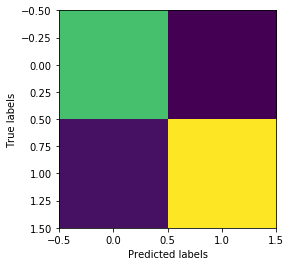

In [ ]:
kn=KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train,Y_train)
y_pred=kn.predict(x_test)
print(accuracy_score(y_pred,Y_test))
print(confusion_matrix(y_pred,Y_test))
plt.imshow(confusion_matrix(y_pred,Y_test))
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [ ]:
l=[]
Y_pred=[]
def distance(x_test,K):
    l=[]
    for i in range(X_train1.shape[0]):
        s=0
        for j,t in zip(x_train1[i],x_test):
            s+=(t-j)**2
        l.append((np.sqrt(s),Y_train1[i]))
       # print(l)
    l.sort()
    l_min=[]
    #print(l)
    for k in range(K):
        l_min.append(l[k])
    l_lables=[]
    #print(l_min)
    for i in l_min:
     l_lables.append(i[1])
    Y_pred.append(most_frequent(l_lables))
    #Y_pred.append((min(l_min))[1])

def most_frequent(List):
    return max(set(List),key=List.count)
for i in range(X_test1.shape[0]):
    distance(x_test1[i],5)#change here for different k value for getting better accuracy
#print(Y_pred,Y_test)
print(accuracy_score(Y_pred,Y_test1))



0.705


20
20


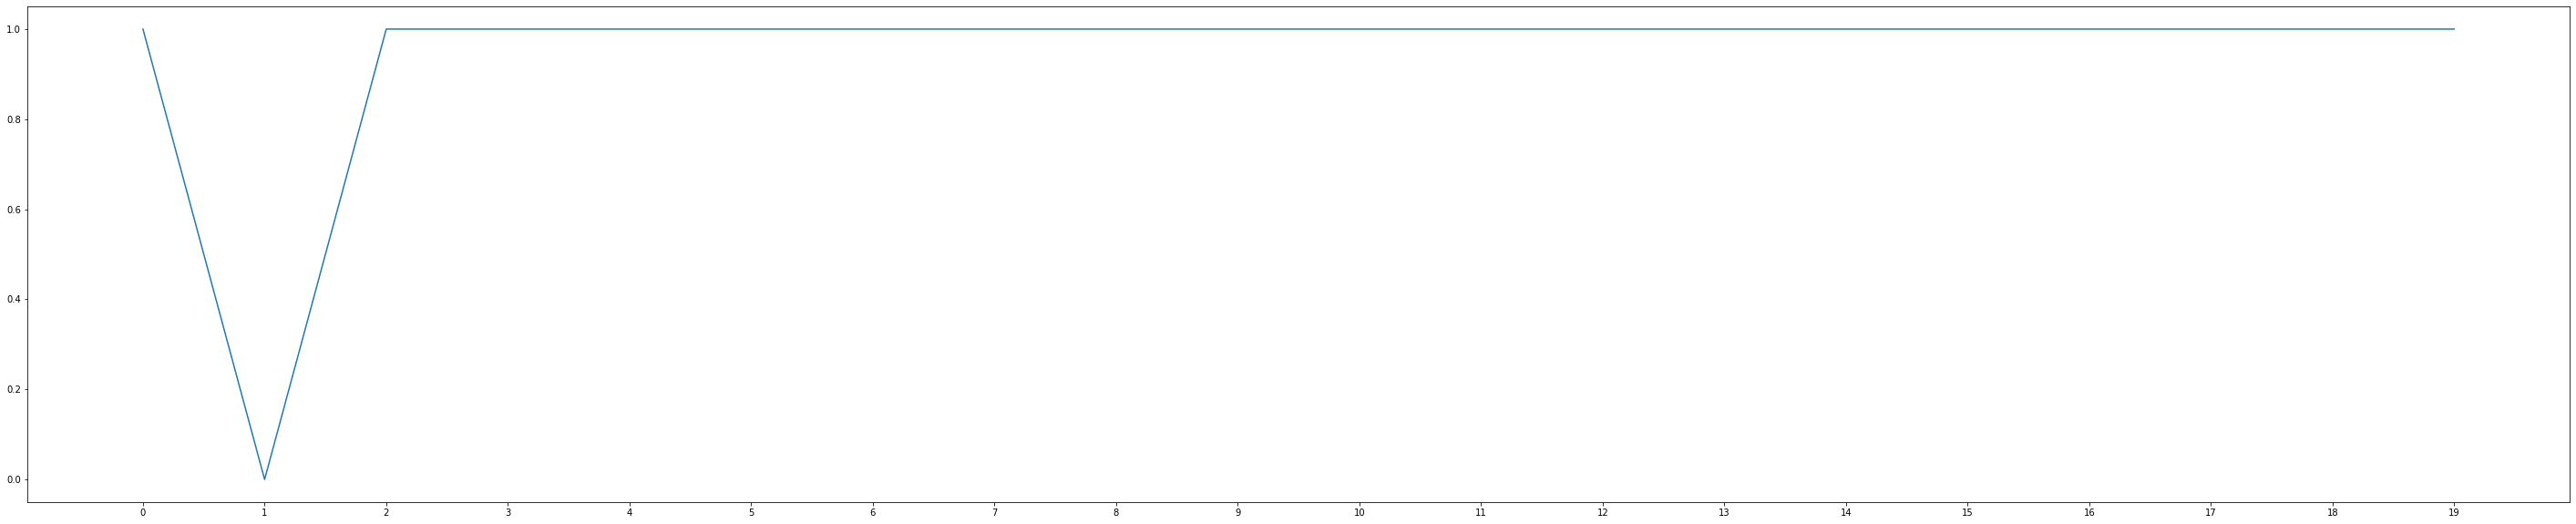

(20, 20)


In [ ]:
from numpy import linalg as LA
from sklearn.preprocessing import StandardScaler

S=np.dot(X_train1.T,X_train1)
#print(S)
eign_value,eign_vect=LA.eig(S)
print(len(eign_value))
eig_sort=np.argsort(eign_value)[::-1]
eig_vect_sort=None
for i in eig_sort:
   if eig_vect_sort is None:
     eig_vect_sort=eign_vect[i]
   else:
     eig_vect_sort=np.vstack((eig_vect_sort,eign_vect[i]))
eig_vect_sort=eig_vect_sort.T 
S_=np.dot(S,eig_vect_sort)
#print(S_)
propotion_variance=[]
c=0
s=0
for v in eign_value:
      f=v
      if(c==0 or c==1):
       #print(v/sum(eign_value))
       propotion_variance.append(f/sum(eign_value))
      else:
        #print(s/sum(eign_value))
        propotion_variance.append(s/sum(eign_value))
      s=s+f
      c+=1
print(len(propotion_variance))
plt.figure(figsize=(50,10))
import matplotlib.pyplot as plt
cols=[i for i in range(len(eign_value))]
plt.plot(cols, propotion_variance)
plt.xticks(cols)
plt.show()
print(eig_vect_sort.shape)

In [ ]:
np.random.seed(0)
class Logistic:
    def __init__(self):
            self.w=np.random.randn(x_train1.shape[1])/(x_train1.shape[1]**0.5)
            self.b=0
            self.v_w=0
            self.m_w=0
            self.v_b=0
            self.m_b=0
    def sigmoid(self,x):
         return(1/(1+np.exp(-x)))
    def loss(self,y,fx):
        return ((fx-y)**2)
    def fit(self,X,Y,eta):
        beta_1=0.9
        beta_2=0.99
        
        for t in range(100):
            dw=0
            db=0
            self.Loss=0
            self.Y_pred=[]
            self.Y_true=[]
            epsilon=1e-10
            num=0
            for x,y in zip(X,Y):
                self.a=np.dot(x,self.w)+self.b
                p=self.sigmoid(self.a)
                if(p>=0.5):
                    fx=2
                else:
                    fx=1
                #self.Loss=self.Loss+self.loss(y,fx)
            self.w=self.w+eta*x
            self.b=self.b-eta*1
        #print("Epochs {}-----------loss {}".format(t,self.Loss))
    def predict(self,x_test):
            pred=[]
            for x in x_test:
                self.a=np.dot(x,self.w)+self.b
                p=self.sigmoid(self.a)
                #print(p)
                if(p>=0.5):
                    fx=2
                else:
                    fx=1
                pred.append(fx)
            return(pred)
                
model=Logistic()
model.fit(X_train1,Y_train1,eta=0.1)


In [ ]:
y_pred=model.predict(X_test1)

In [ ]:
y_pred

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [ ]:
Y_test1

array([1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [ ]:
ohe = OneHotEncoder(categories='auto')
Y_cat_train= ohe.fit_transform(Y_train.reshape(-1,1)).toarray()
Y_cat_test= ohe.fit_transform(Y_test.reshape(-1,1)).toarray()
Y_cat_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

# Artificial neural Network

In [ ]:
model=Sequential()
model.add(Dense(12,input_dim=15))
model.add(Dense(4))
model.add(Dense(2,activation='softmax'))

NameError: ignored

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_cat_train,epochs=200,validation_data=(X_test,Y_cat_test),verbose=1)

In [ ]:
y_pred=model.predict(x_test)
print(np.argmax(y_pred,axis=1))
print(accuracy_score(np.argmax(y_pred,axis=1),np.argmax(Y_cat_test,axis=1)))
print(confusion_matrix(np.argmax(y_pred,axis=1),np.argmax(Y_cat_test,axis=1)))
plt.imshow(confusion_matrix(y_pred,Y_test))
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [ ]:
scores_svm =cross_val_score(SVC(gamma='auto'), x, y, cv=5)
print(scores_svm.mean())

In [ ]:
scores_NB =cross_val_score(Nb, x, y, cv=5)
print(scores_NB.mean())

In [ ]:
scores_kn =cross_val_score(kn, x, y, cv=5)
print(scores_kn.mean())

In [ ]:
result={'svm':scores_svm,'knn':scores_kn,'Nb':scores_NB}
performance_matrix=pd.DataFrame(result,columns=['svm','knn','Nb'])

In [ ]:
performance_matrix